# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np
from types import SimpleNamespace
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject as model

In [2]:

# Definerer class fra givet HouseholdSpecializationModel 

class HouseholdSpecializationModelClass:

    def __init__(self):
        """ setup model """

        # a. create namespaces
        par = self.par = SimpleNamespace()
        sol = self.sol = SimpleNamespace()

        # b. preferences
        par.rho = 2.0 #tjek
        par.nu = 0.001 #tjek
        par.epsilon = 1.0 #tjek
        par.omega = 0.5 #tjek

        # c. household production
        par.alpha = 0.5 #tjek
        par.sigma = 1.0 #tjek

        # d. wages
        par.wM = 1.0 #tjek
        par.wF = 1.0 #tjek
        par.wF_vec = np.linspace(0.8,1.2,5)

        # e. targets
        par.beta0_target = 0.4
        par.beta1_target = -0.1

        # f. solution
        sol.LM_vec = np.zeros(par.wF_vec.size)
        sol.HM_vec = np.zeros(par.wF_vec.size)
        sol.LF_vec = np.zeros(par.wF_vec.size)
        sol.HF_vec = np.zeros(par.wF_vec.size)

        sol.beta0 = np.nan
        sol.beta1 = np.nan

    def calc_utility(self,LM,HM,LF,HF):
        """ calculate utility """

        par = self.par
        sol = self.sol

        # a. consumption of market goods
        C = par.wM*LM + par.wF*LF

        # b. home production
        if par.sigma == 0:
            H = optimize.minimize(HF,HM)
        elif par.sigma == 1:
            H = HM**(1-par.alpha)*HF**par.alpha
        else:
            H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
       
        # c. total consumption utility
        Q = (C**par.omega)*(H**(1-par.omega))
        utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)

        # d. disutlity of work
        epsilon_ = 1+1/par.epsilon
        TM = LM+HM
        TF = LF+HF
        disutility = par.nu*(TM**epsilon_/epsilon_+TF**epsilon_/epsilon_)
        
        return utility - disutility

    def solve_discrete(self,do_print=False):
        """ solve model discretely """
        
        par = self.par
        sol = self.sol
        opt = SimpleNamespace()
        
        # a. all possible choices
        x = np.linspace(0,24,49)
        LM,HM,LF,HF = np.meshgrid(x,x,x,x) # all combinations
    
        LM = LM.ravel() # vector
        HM = HM.ravel()
        LF = LF.ravel()
        HF = HF.ravel()

        # b. calculate utility
        u = self.calc_utility(LM,HM,LF,HF)
    
        # c. set to minus infinity if constraint is broken
        I = (LM+HM > 24) | (LF+HF > 24) # | is "or"
        u[I] = -np.inf
    
        # d. find maximizing argument
        j = np.argmax(u)
        
        opt.LM = LM[j]
        opt.HM = HM[j]
        opt.LF = LF[j]
        opt.HF = HF[j]

        # e. print
        if do_print:
            for k,v in opt.__dict__.items():
                print(f'{k} = {v:6.4f}')

        return opt
    

# Question 1

**Illustrate how $H_F / H_M$ changes when varying $\alpha \in {0.25, 0.5, 0.75}$ and $\sigma \in {0.5, 1.0, 1.5}$.**

In [32]:
#Definerer alpha og sigma værdier

alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1, 1.5]
mo = HouseholdSpecializationModelClass()

#Printer værdier for HF/HM mht. ovenstående alpha og sigma værdier

for alpha in alpha_values:
    for sigma in sigma_values:
        mo.par.alpha = alpha
        mo.par.sigma = sigma
        res = mo.solve_discrete()
        print(f"alpha er {alpha} og sigma er {sigma}")
        print(f"HF:{res.HF}/ HM:{res.HM} --> {res.HF/res.HM}")


/var/folders/qv/tz1h_hsd5fb2k7dm0jrqym9r0000gn/T/ipykernel_59474/2638855021.py:65: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/var/folders/qv/tz1h_hsd5fb2k7dm0jrqym9r0000gn/T/ipykernel_59474/2638855021.py:65: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/var/folders/qv/tz1h_hsd5fb2k7dm0jrqym9r0000gn/T/ipykernel_59474/2638855021.py:69: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


alpha er 0.25 og sigma er 0.5
HF:3.0/ HM:5.5 --> 0.5454545454545454
alpha er 0.25 og sigma er 1
HF:2.0/ HM:6.5 --> 0.3076923076923077
alpha er 0.25 og sigma er 1.5
HF:1.5/ HM:7.0 --> 0.21428571428571427
alpha er 0.5 og sigma er 0.5
HF:4.5/ HM:4.5 --> 1.0
alpha er 0.5 og sigma er 1
HF:4.5/ HM:4.5 --> 1.0
alpha er 0.5 og sigma er 1.5
HF:4.5/ HM:4.5 --> 1.0
alpha er 0.75 og sigma er 0.5
HF:5.5/ HM:3.0 --> 1.8333333333333333
alpha er 0.75 og sigma er 1
HF:6.5/ HM:2.0 --> 3.25
alpha er 0.75 og sigma er 1.5
HF:7.0/ HM:1.5 --> 4.666666666666667


# Question 2

Explain your code and procedure

/var/folders/qv/tz1h_hsd5fb2k7dm0jrqym9r0000gn/T/ipykernel_59474/2638855021.py:69: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]
[-0.2231435513142097, -0.10536051565782628, 0.0, 0.09531017980432493, 0.1823215567939546]


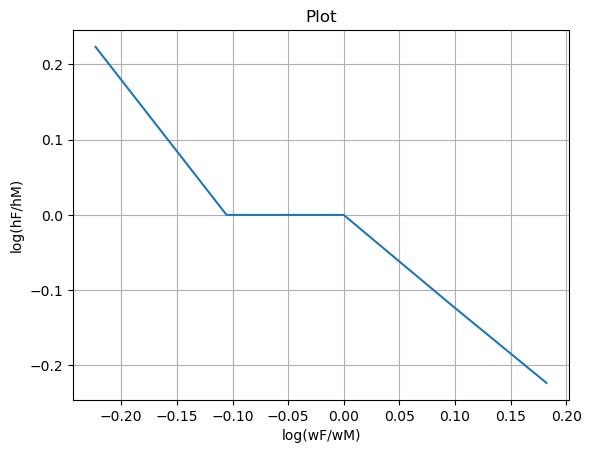

In [33]:
w_f_values = [0.8, 0.9, 1.0, 1.1, 1.2]
log_w_f_w_m = []
log_h_f_h_m = []
mo = HouseholdSpecializationModelClass()
for w_f in w_f_values:
        mo.par.wF = w_f
        res = mo.solve_discrete()
        log_w_f_w_m.append(np.log(mo.par.wF/mo.par.wM))
        log_h_f_h_m.append(np.log(res.HF/res.HM))
fig, ax = plt.subplots()
print(log_h_f_h_m)
print(log_w_f_w_m)
ax.plot(log_w_f_w_m, log_h_f_h_m)
ax.set(xlabel='log(wF/wM)', ylabel='log(hF/hM)', title='Question 2')
ax.grid()
fig.savefig("test.png")
plt.show()

Jf. ovenstående plot kan det ses at jo højere løn kvinder har ift. mænd, jo mindre tid arbejder de i hjemmet. 

# Question 3

In [135]:
import numpy as np
from scipy.optimize import minimize

# Baseline parameters
a = 0.5
sigma = 1
omega = 0.5
rho = 2
v = 0.001
epsilon = 1
wM = 1

# Vi sætter værdierne for w_F til at være: 
wF_list = [0.8, 0.9, 1.0, 1.1, 1.2]

# Vi definerer home produktion H og tilhørende budget restriktioner
def u(x, wF):
    LM, HM, LF, HF = x
    C = wM * LM + wF * LF
    if sigma == 0:
        H = min(HM, HF)
    elif sigma == 1:
        H = HM**(1-a) * HF**a
    else:
        H = ((1-a) * HM**((sigma-1)/sigma) + a * HF**((sigma-1)/sigma))**(sigma/(sigma-1))
    Q = C**omega * H**(1-omega)
    T = LM + HM + LF + HF
    disutility = v * (LM**(1+1/epsilon) / (1+1/epsilon) + LF**(1+1/epsilon) / (1+1/epsilon))
    return -(Q**(1-rho) / (1-rho) - disutility)

# Constraints
cons = ({'type': 'ineq', 'fun': lambda x: wM * x[0] + wF * x[2] - x[3]},
        {'type': 'ineq', 'fun': lambda x: wM * x[1] + wF * x[3] - x[2]},
        {'type': 'ineq', 'fun': lambda x: x[0] + x[1] - 24},
        {'type': 'ineq', 'fun': lambda x: x[2] + x[3] - 24},
        {'type': 'ineq', 'fun': lambda x: x[0]},
        {'type': 'ineq', 'fun': lambda x: x[1]},
        {'type': 'ineq', 'fun': lambda x: x[2]},
        {'type': 'ineq', 'fun': lambda x: x[3]})
# Constraints sikrer, at summerne af henholdsvis de første to og de sidste to variabler er mindre end eller lig med 24.

# Forskellige værdier af wF
for wF in wF_list:
    result = minimize(u, [12, 6, 12, 6], args=(wF,), constraints=cons, method='Nelder-Mead')
    LM, HM, LF, HF = result.x
    print(f"wF/wM = {wF/wM:.1f}: log(HF)/log(HM) = {np.log(HF)/np.log(HM):.3f}")

# Koden definerer en nyttefunktion "u(x, wF)", som tager fire beslutningsvariable og en parameter "wF" som input. 
# Derefter løser den optimeringsproblemet for forskellige værdier af "wF". 
# Optimeringsproblemet har otte ulighedsbetingelser, der inkluderer beslutningsvariable og "wF".

wF/wM = 0.8: log(HF)/log(HM) = 0.971
wF/wM = 0.9: log(HF)/log(HM) = 0.983
wF/wM = 1.0: log(HF)/log(HM) = 1.094
wF/wM = 1.1: log(HF)/log(HM) = 0.943
wF/wM = 1.2: log(HF)/log(HM) = 0.950


/Users/poulmartinpetri/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,
/var/folders/qv/tz1h_hsd5fb2k7dm0jrqym9r0000gn/T/ipykernel_59474/3329733139.py:26: RuntimeWarning: invalid value encountered in double_scalars
  Q = C**omega * H**(1-omega)


# Question 4

In [136]:
#Minimize calculation

from scipy import optimize
import inauguralproject

def objective_func(par): 
    alpha, sigma = par
    model = inauguralproject.HouseholdSpecializationModelClass()
    model.par.alpha = alpha
    model.par.sigma = sigma
    b_0 = 0.4
    b_1 = -0.1

    for i in range(5):
        model.par.wF = model.par.wF_vec[i]
        results = model.solve_continous()
        model.sol.HF_vec[i] = results.HF
        model.sol.HM_vec[i] = results.HM

    model.run_regression()
    b_hat_0 = model.sol.beta0
    b_hat_1 = model.sol.beta1
    return ((b_0 - b_hat_0)**2 + (b_1 - b_hat_1)**2)


par_guess = [0.5,1.0]
bounds = ((0,1),(0,4))

result = optimize.minimize(objective_func, par_guess,bounds=bounds, method = "Nelder-Mead")
x = (result.x[0],result.x[1])
print(f'To minimize the squared deviation, the values for the parametres should be: alpha = {result.x[0]:.3f} and sigma = {result.x[1]:.3f}')

/Users/poulmartinpetri/Library/CloudStorage/OneDrive-UniversityofCopenhagen/KU - Polit/6. SEM/INTRO. PROG./projects-2023-snj927-vpc398/inauguralproject/inauguralproject.py:61: RuntimeWarning: divide by zero encountered in double_scalars
  else:
/Users/poulmartinpetri/Library/CloudStorage/OneDrive-UniversityofCopenhagen/KU - Polit/6. SEM/INTRO. PROG./projects-2023-snj927-vpc398/inauguralproject/inauguralproject.py:61: RuntimeWarning: invalid value encountered in double_scalars
  else:


To minimize the squared deviation, the values for the parametres should be: alpha = 0.988 and sigma = 0.091


# Question 5

Vi havde store problemer med at få kodningen til at virke, hvilket vi beklager. Gentagende gange i spørgsmål 3 og 4 får vi en fejlmeddelse "Output exceeds the size limit. Open the full output data in a text editor", som gør at vi ikke kunne plotte. Samme problemstilling er vi løbet ind i spørgsmål 5, hvor vi får at vide at nogle af vores variable er ulovlige.

Derfor har vi ikke kunne færdiggøre vores projekt (spørgsmål 5). Det er igen meget beklageligt, og vi vil naturligvis hive fat i vores holdunderviser, Jonas, så det er løst før eksamen og endelig aflevering af projekt. 